In [6]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
data = pd.read_csv('./delivery_raw.csv',sep='\t')
print('=============결측치 개수=============')
print(f'총 데이터 개수 : {len(data)}개')
for key in data.keys():
    num = data[key].isna().sum()
    if num: print(f'{key} : {num}')

=============결측치 개수=============
총 데이터 개수 : 197428개
market_id : 987
actual_delivery_time : 7
store_primary_category : 4760
order_protocol : 995
total_onshift : 16262
total_busy : 16262
total_outstanding_orders : 16262
estimated_store_to_consumer_driving_duration : 526


In [8]:
# 날짜 datetime 변환 및 target 만들기
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])
data['target'] = (data['actual_delivery_time'] - data['created_at']).dt.seconds
data = data[data['target']<10000]

주문시간 분포

<Axes: xlabel='order_time', ylabel='Count'>

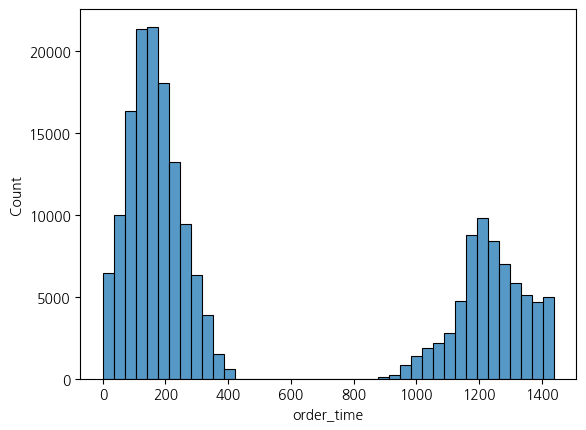

In [10]:
data['order_time'] = data['created_at'].apply(lambda x: (60*x.hour + x.minute))
sns.histplot(data['order_time'])

9시경 부터 주문이 없다는 것을 알 수 있다 -> 분포를 바꾸면

<Axes: xlabel='order_time', ylabel='Count'>

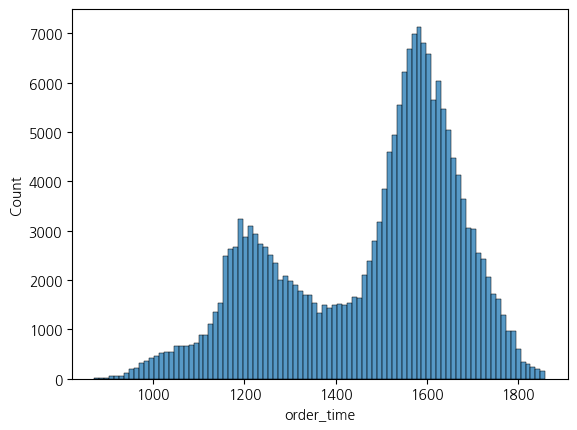

In [9]:
# hour, minute 추출 후 주문시간 만들기 + 요일 만들기

data['hour'] = data['created_at'].apply(lambda x: x.hour).astype('category')            # 9~13이 없음
data['minute'] = data['created_at'].apply(lambda x: x.minute).astype('category')        # 0~59 모두 있음
data['order_time'] = data['created_at'].apply(lambda x: (60*x.hour + x.minute) if x.hour>10 else (60*(x.hour+24) + x.minute))
data['day_of_week'] = data['created_at'].apply(lambda x: x.day_name()).astype('category')

sns.histplot(data['order_time'])

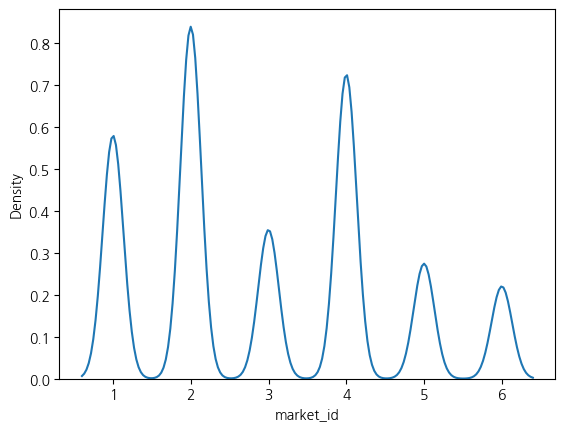

In [4]:
# market_id
sns.kdeplot(data['market_id'])
plt.show()

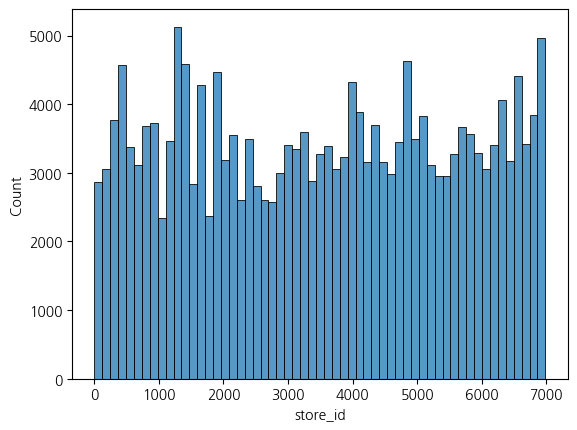

In [5]:
# store_id
sns.histplot(data['store_id'])
plt.show()

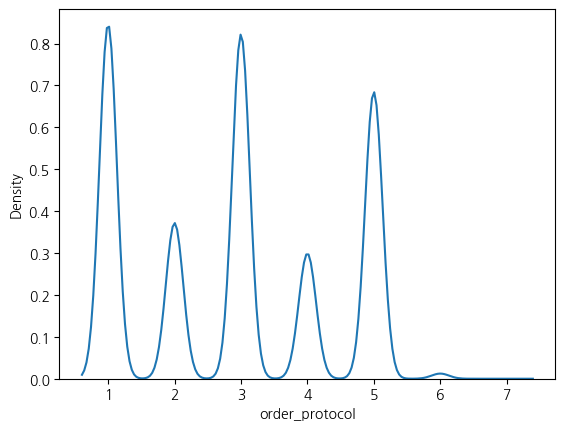

In [6]:
# order_protocol
sns.kdeplot(data['order_protocol'])
plt.show()

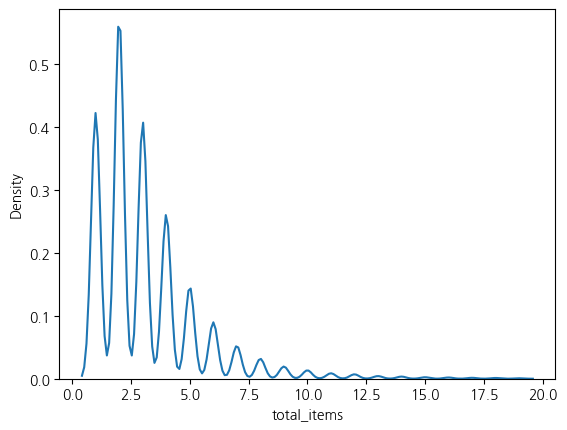

In [7]:
# total_items
sns.kdeplot(data[data['total_items']<20]['total_items'])
plt.show()

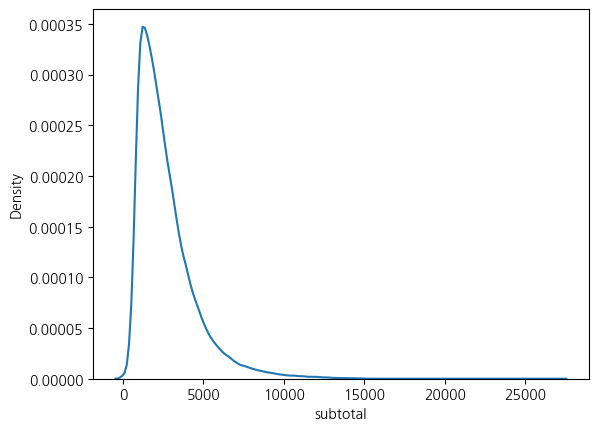

In [8]:
# subtotal
sns.kdeplot(data['subtotal'])
plt.show()

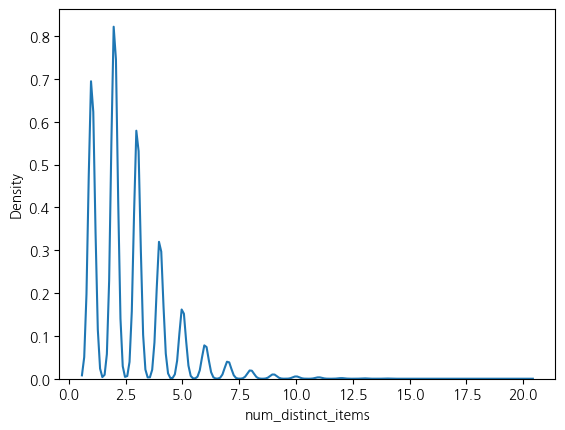

In [9]:
# num_distinct_items
sns.kdeplot(data['num_distinct_items'])
plt.show()

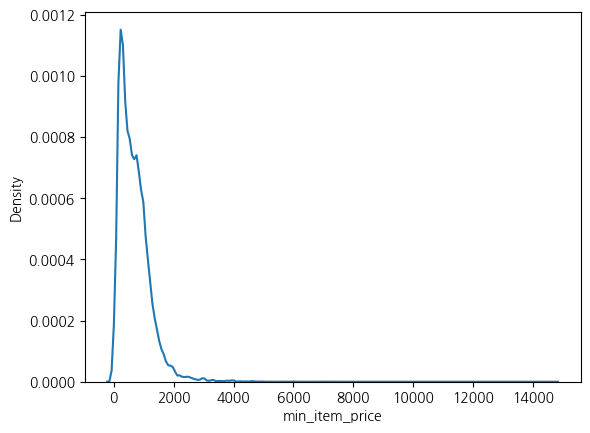

In [10]:
# min_item_price
sns.kdeplot(data['min_item_price'])
plt.show()

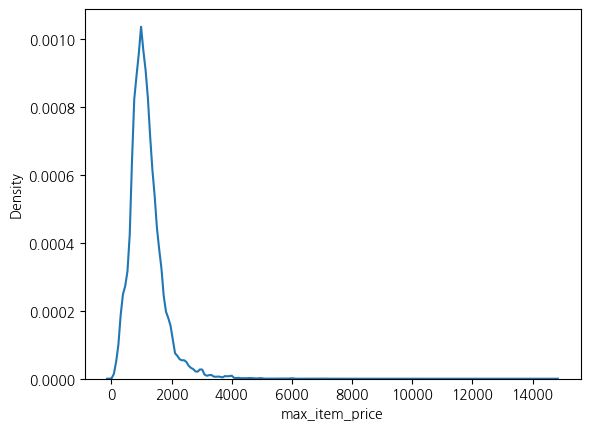

In [11]:
# max_item_price
sns.kdeplot(data['max_item_price'])
plt.show()

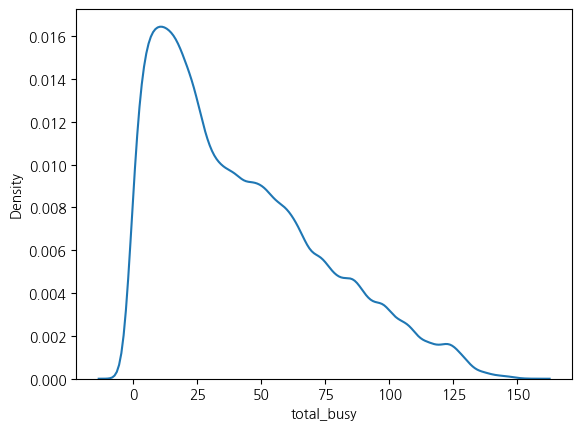

In [12]:
# total_busy
sns.kdeplot(data['total_busy'])
plt.show()

In [ ]:
data['order_time'] = data['created_at'].apply(lambda x: 60*x.hour + x.minute)
sns.histplot(data['order_time'])

In [ ]:
data['order_time'] = data['created_at'].apply(lambda x: (60*x.hour + x.minute) if x.hour>10 else (60*(x.hour+24) + x.minute))
sns.histplot(data['order_time'])